# Physics 240 - Assignment 2

DISCLAIMER: I know the code I have written is not very clean and not the most efficient (especially towards the end) but I valued making it work first and didn't have time to clean it up, I hope that's ok.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special
import scipy.optimize
import scipy.linalg

## Problem 1 : Modelling Noisy Data

We measure two quantities related by

$$ y=ax $$

### a.)

Generate fake data with $a = 0.5$. Generate $N=10,000$ variables $z_{i} \sim U[0,1] $. We then generate:

$$ x_{i} = z_{i} + N(0,1) $$
$$ y_{i} = a z_{i} + N(0,1) $$

where the gaussian noise is independent. This data is then plotted with the 'true' line overlayed over.

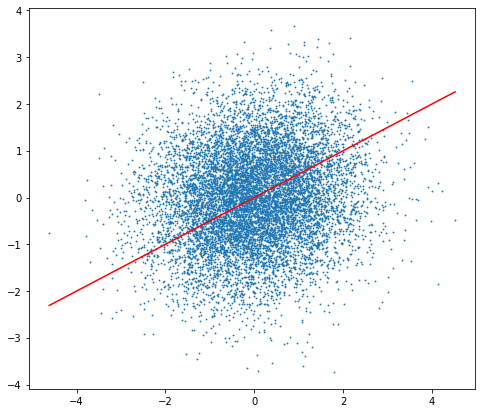

In [14]:
a_true = 0.5
N = 10000

z_i_vals = np.random.uniform(-1, 1, N)
x_i_vals = z_i_vals + np.random.normal(0, 1, N)
y_i_vals = a_true * z_i_vals + np.random.normal(0, 1, N)

x_true_vals = np.linspace(min(x_i_vals), max(x_i_vals), 1000)
y_true_vals = a_true * x_true_vals

fig = plt.figure(figsize=(8, 7))
ax = fig.add_subplot(111)
ax.scatter(x_i_vals, y_i_vals, s=0.7)
ax.plot(x_true_vals, y_true_vals, color='red')
plt.show()

### b.)

Ignoring errors in $x_{i}$, $\delta y_{i} \sim N(0, 1)$ so the covariance matrix explicity is:

$$ \Sigma_{ij} = \langle \delta y_{i} \delta y_{j} \rangle = \sigma_{y_{i}} = I $$

So then to get the $\chi^2$ we have:

$$ \chi^2 = (d - A \cdot \theta)^T \cdot \Sigma^{-1} \cdot (d - A \cdot \theta) $$

where : $ A = \begin{pmatrix}
x_{1} \\
x_{2} \\
\vdots \\
x_{N}
\end{pmatrix} $ , $ \theta = \begin{pmatrix} a \end{pmatrix} $ , $ d = y_{i} $. Since we can do this analytically, writing this out in full:

$$ \chi^2 = \sum_{i=1}^{N} \frac{(y_{i} - a x_{i})^2}{\sigma_{y_{i}}^2} = \sum_{i=1}^{N} (y_{i} - a x_{i})^2 $$

To find the MLE, $a^*$, we minimize this $\chi^2$ with respect to $a$:

$$ \frac{\partial \chi}{\partial a} = 2 \sum_{i=1}^{N} (y_{i} - a x_{i}) (-x_{i}) = 0 $$

$$ \sum_{i=1}^{N} x_{i} y_{i} - a \sum_{i=1}^{N} x_{i}^2 = 0 $$

$$ a^* = \frac{\sum_{i=1}^{N} x_{i} y_{i}}{\sum_{i=1}^{N} x_{i}^2} $$

The covariance of the MLE is then given by:

$$ \Sigma_{a^*} = \beta^{-1} = (A \cdot \Sigma^{-1} \cdot A)^{-1} $$

which when written in full for $ \Sigma = I $ gives the standard deviation as:

$$ \sigma_{a^*} = \sqrt{\Sigma_{a^*}} = \sqrt{\frac{1}{\sum_{i=1}^{N} x_{i}^2}} $$

In [15]:
numerator = np.sum(x_i_vals * y_i_vals)
denominator = np.sum(x_i_vals**2)
a_MLE = numerator/denominator
a_MLE_std = np.sqrt(1 / np.sum(x_i_vals**2))
num_std_out = np.abs((a_true - a_MLE)/a_MLE_std)
num_std_out_prob = scipy.special.erfc(num_std_out/np.sqrt(2))

print(f"Best-fit value for 'a' is : {a_MLE:.3f} ± {a_MLE_std:.4f}")
print(f"The value is {num_std_out:.1f} sigma from the 'true' value of 0.5, the odds of getting such a value is {num_std_out_prob:.2e}")

Best-fit value for 'a' is : 0.124 ± 0.0087
The value is 43.3 sigma from the 'true' value of 0.5, the odds of getting such a value is 0.00e+00


### c.)


Now including errors in $x_{i}$, we can briefly define a new variable:

$$ w = y - ax $$

with variance given by:

$$ \sigma_{w_{i}} = \sigma_{y_{i}}^2 + a \sigma_{x_{i}}^2 $$

If we wanted to look at this another way:

$$ \Sigma_{ij} = \langle (\delta y_{i} + a \delta x_{i}) (\delta y_{j} + a \delta x_{j}) \rangle = \delta_{ij} (\sigma_{y_{i}}^2 + a \sigma_{x_{i}}^2) $$

using the fact that $\delta y_{i} \sim N(0,\sigma_{y_{i}}^2)$ and $\delta x_{i} \sim N(0,\sigma_{x_{i}}^2)$ are independent errors (note that $x_{i}$ and $y_{i}$ are themselves not independent since the both come from the same realisation of $z_{i}$, this is only a statement about their errors!).

This gives the $\chi^2$ written out in full to be:

$$ \chi^2 = \sum_{i=1}^{N} \frac{(y_{i} - a x_{i})^2}{\sigma_{y_{i}}^2 + a^2 \sigma_{x_{i}}^2} $$

To find the MLE, $a^*$ we minimize this $\chi^2$ with respect to $a$:

$$ \frac{\partial \chi}{\partial a} = \frac{2}{\sigma_{y}^2 + a^2 \sigma_{x}^2} \sum_{i=1}^{N} (y_{i} - a x_{i}) (-x_{i}) + \frac{(-1) 2a \sigma_{x}^2}{(\sigma_{y}^2 + a^2 \sigma_{x}^2)^2} \sum_{i=1}^{N} (y_{i} - a x_{i})^2 = 0 $$

where to do this analytically we assume all $\sigma_{x_{i}}$ and $\sigma_{y_{i}}$ are respectively equal ($\sigma_{x_{i}} = \sigma_{x}$ and $\sigma_{y_{i}} = \sigma_{y}$).

So we have :

$$ \sum_{i=1}^{N} x_i (a x_i - y_i) = \frac{a \sigma_{x}^2}{\sigma_{y}^2 + a^2 \sigma_{x}^2} \sum_{i=1}^{N} (y_{i} - a x_{i})^2 $$

$$ a \sum_{i=1}^{N} x_i^2 - \sum_{i=1}^{N} x_i y_i = \frac{a \sigma_{x}^2}{\sigma_{y}^2 + a^2 \sigma_{x}^2} \left( \sum_{i=1}^{N} y_i^2 + a^2 \sum_{i=1}^{N} x_i^2 - 2a \sum_{i=1}^{N} x_i y_i \right) $$

$$ a \sigma_y^2 \sum_{i=1}^{N} x_i^2 - \sigma_y^2 \sum_{i=1}^{N} x_i y_i + a^3 \sigma_x^2 \sum_{i=1}^{N} x_i^2 - a^2 \sigma_x^2 \sum_{i=1}^{N} x_i y_i = a \sigma_x^2 \sum_{i=1}^{N} y_i^2 + a^3 \sigma_x^2 \sum_{i=1}^{N} x_i^2 - 2a^2 \sigma_x^2 \sum_{i=1}^{N} x_i y_i $$

$$ a^2 \left( \sigma_x^2 \sum_{i=1}^{N} x_i y_i \right) + a \left( \sigma_y^2 \sum_{i=1}^{N} x_i^2 - \sigma_x^2 \sum_{i=1}^{N} y_i^2 \right) - \sigma_y^2 \sum_{i=1}^{N} x_i y_i = 0 $$

Which using an 'error ratio' $\gamma = \frac{\sigma_y}{\sigma_x}$ for clarity, gives the quadratic equation:

$$ a^2 + a \left( \frac{\gamma^2 \sum_{i=1}^{N} x_i^2 - \sum_{i=1}^{N} y_i^2}{\sum_{i=1}^{N} x_i y_i} \right) - \gamma^2 = 0 $$

In this case we have $\sigma_x = \sigma_y = 1$ so we use $\gamma = 1$.

In [16]:
def quadratic_solver(a, b, c):

    temp = -1

    roots = []
    for i in [1, 2]:
        root = (-b + temp**i * np.sqrt(b**2 - 4 * a * c)) / (2 * a)
        roots.append(root)

    return roots

solns = quadratic_solver(1, (np.sum(x_i_vals**2) - np.sum(y_i_vals**2)) / np.sum(x_i_vals * y_i_vals), -1)

for soln in solns:
    if soln > 0:
        a_MLE = soln
    else:
        a_MLE = 0

try:
    print(f"Best-fit value for 'a' is : {a_MLE:.3f}")
except TypeError:
    print(f"Best-fit values for 'a' are : {solns[0]:.3f} and {solns[1]:.3f} (something might be wrong if this is printed)")

dof = N - 1
chi_squared_threshold = np.sqrt(2/dof)

chi_squared = np.sum((y_i_vals - a_MLE * x_i_vals)**2 / (1 + a_MLE**2))
chi_squared_per_dof = chi_squared / dof

print(f"The chi-squared per degree of freedom ({dof}) is {chi_squared_per_dof:.4f}")
print(f"'Good' chi-squared threshold for {dof} DoF is ± {chi_squared_threshold:.3f}. This is {np.abs((chi_squared_per_dof - 1)/chi_squared_threshold):.1f} times away from calculated (minimized) chi-squared value.")

Best-fit value for 'a' is : 0.498
The chi-squared per degree of freedom (9999) is 0.9937
'Good' chi-squared threshold for 9999 DoF is ± 0.014. This is 0.4 times away from calculated (minimized) chi-squared value.


If we do this for bigger values of N, we can see that out $a^*$ converges to the 'true' value of $a$ in the 'infinite' $N$ limit (because of the CLT).

In [17]:
def MLE_from_N(no_trials):
    N_other = no_trials
    z_i_vals_other = np.random.uniform(-1, 1, N_other)
    x_i_vals_other = z_i_vals_other + np.random.normal(0, 1, N_other)
    y_i_vals_other = a_true * z_i_vals_other + np.random.normal(0, 1, N_other)

    solns_other = quadratic_solver(1, (np.sum(x_i_vals_other**2) - np.sum(y_i_vals_other**2)) / np.sum(x_i_vals_other * y_i_vals_other), -1)
    a_MLE_other = None
    for soln_other in solns_other:
        if soln > 0:
            a_MLE_other = soln_other

    return a_MLE_other

for N_trial in [100_000, 1_000_000, 10_000_000]:
    print(f"Using N = {N_trial}, best-fit value for 'a' is : {MLE_from_N(N_trial):.5f}")

Using N = 100000, best-fit value for 'a' is : 0.50717
Using N = 1000000, best-fit value for 'a' is : 0.49921
Using N = 10000000, best-fit value for 'a' is : 0.49955


### d.)

To see what happens if our errors are not right, we can use the same data but set $\sigma_x$ to $1.15 \sigma_x$ (overestimate by 15%) and $\sigma_y$ to $0.7 \sigma_y$ (underestimate by 30%) where $\sigma_x = \sigma_y = 1$ is still true. The only effect of this is to change the value of $\gamma$ in the formula given in part c.) .

The number of degrees of freedoms in this calculation given by :

$$ dof = N - k $$

where $N$ is the number of datapoints (10,000) and $k$ is the number of fit parameters (1).

A good measure for the threshold on the $\chi^2$ value for a 'good fit' is given by:

$$ \frac{\chi^2}{N-k} \sim 1 \pm \sqrt{\frac{2}{N-k}} $$

In [18]:
error_ratio = 0.7 / 1.15

solns = quadratic_solver(1, (error_ratio**2 * np.sum(x_i_vals**2) - np.sum(y_i_vals**2)) / np.sum(x_i_vals * y_i_vals), -error_ratio**2)

for soln in solns:
    if soln > 0:
        a_MLE = soln
    else:
        a_MLE = 0

try:
    print(f"Best-fit value for 'a' is : {a_MLE:.3f}")
except TypeError:
    print(f"Best-fit values for 'a' are : {solns[0]:.3f} and {solns[1]:.3f} (something might be wrong if this is printed)")

chi_squared = np.sum((y_i_vals - a_MLE * x_i_vals)**2 / (0.7**2 + a_MLE**2 * 1.15**2))
chi_squared_per_dof = chi_squared / dof

print(f"The chi-squared per degree of freedom ({dof}) is {chi_squared_per_dof:.4f}")
print(f"'Good' chi-squared threshold for {dof} DoF is ± {chi_squared_threshold:.3f}. This is {np.abs((chi_squared_per_dof - 1)/chi_squared_threshold):.1f} times away from calculated (minimized) chi-squared value.")


Best-fit value for 'a' is : 3.673
The chi-squared per degree of freedom (9999) is 0.9665
'Good' chi-squared threshold for 9999 DoF is ± 0.014. This is 2.4 times away from calculated (minimized) chi-squared value.


While the $\chi^2$ seems to indicate that this could be a good model for our data, our MLE is quite far off the true value.

### e.)

Generate new data with the same model and $N=10,000$ variables $z_{i} \sim U[0,1] $. But this time the noise on $x_i$ is different for each point:

$$ x_{i} = z_{i} + N(0,\sigma_{x_{i}}^2 = \sigma_x^2 |z_i|) $$
$$ y_{i} = a z_{i} + N(0,\sigma_{y_{i}}^2 = \sigma_y^2) $$

where $\sigma_x = \sigma_y = 1$ as before.

In [19]:
a_true = 0.5
N = 10000

z_i_vals = np.random.uniform(-1, 1, N)
y_i_vals = a_true * z_i_vals + np.random.normal(0, 1, N)
x_i_vals = z_i_vals + np.random.normal(0, abs(z_i_vals), N)

First take the variance on our dataset to be (something you could do for real data):

$$ \sigma^2 = \sigma_y^2 + a^2 \sigma_x^2 |x_i| = 1 + a^2 |x_i| $$

so that the $\chi^2$ can be written as:

$$ \chi^2 = \sum_{i=1}^{N} \frac{(y_{i} - a x_{i})^2}{1 + a^2 |x_i|} $$

This minimisation cannot be done analytically, so we do it numerically using a grid of trial $a$ values. To get the error on our $a^*$, we can use the fact that :

$$ \Delta \chi^2 = 1 $$

in the $1 \sigma_a$ interval (also done numerically).

In [20]:
def question_1_e(part_no):

    if part_no == 1:
        scaling = abs(x_i_vals)
    elif part_no == 2:
        scaling = abs(z_i_vals)

    def chi_squared_function(a):

        return np.sum( np.power( (y_i_vals - a * x_i_vals), 2 ) / (1 + a**2 * scaling) )

    a_trials = np.linspace(-100, 500, 10000)
    chi_squared_trials = []
    for a_trial in a_trials:
        temp = chi_squared_function(a_trial)
        chi_squared_trials.append(temp)

    min_index = np.argmin(chi_squared_trials)
    chi_squared_min = chi_squared_trials[min_index]
    a_MLE = a_trials[min_index]

    # Remember list splicing is [include :  not include]
    std_index_lower = np.argmin(np.abs(chi_squared_trials[:min_index] - (chi_squared_min + 1)))
    std_index_upper = np.argmin(np.abs(chi_squared_trials[min_index:] - (chi_squared_min + 1))) + min_index

    a_MLE_std = 0.5 * ( np.abs(a_MLE - a_trials[std_index_lower]) + np.abs(a_MLE - a_trials[std_index_upper]) )
    num_std_out = np.abs((a_true - a_MLE)/a_MLE_std)
    num_std_out_prob = scipy.special.erfc(num_std_out/np.sqrt(2))

    print(f"Best-fit value for 'a' is : {a_MLE:.3f} ± {a_MLE_std:.4f}")
    print(f"The value is {num_std_out:.1f} sigma from the 'true' value of 0.5, the odds of getting such a value is {num_std_out_prob:.2e}")

question_1_e(1)

Best-fit value for 'a' is : 125.323 ± 47.0747
The value is 2.7 sigma from the 'true' value of 0.5, the odds of getting such a value is 8.01e-03


Now take the variance to instead be (something you can't do for real data since it isn't possible to 'access' the underlying z dist):

$$ \sigma^2 = \sigma_y^2 + a^2 \sigma_x^2 |x_i| = 1 + a^2 |z_i| $$

so that the $\chi^2$ can be written as:

$$ \chi^2 = \sum_{i=1}^{N} \frac{(y_{i} - a x_{i})^2}{1 + a^2 |z_i|} $$

and the minimisation can again be done numerically as before.

In [21]:
question_1_e(2)

Best-fit value for 'a' is : 1.050 ± 0.0600
The value is 9.2 sigma from the 'true' value of 0.5, the odds of getting such a value is 4.84e-20


## Problem 2 : Cosmic Dawn

The original paper is available at https://www.nature.com/articles/nature25792.

### Part 1

### a.)

We define $\nu$ as the frequencu divided my the central frequency, 75 MHz. We fit the sky temperature with the model:

$$ T[\nu] \approx a_0 \nu^{-2.5} + a_1 \nu^{-2.5} ln{\nu} + a_2 \nu^{-2.5} (ln{\nu})^2 + a_3 \nu^{-4.5} + a_4 \nu_{1}^{-2} $$

using unit weights. To do the least-squares minimization, the model gives us:

$ A = \begin{pmatrix}
\nu_{1}^{-2.5} & \nu_{1}^{-2.5} ln{\nu_1} & \nu_{1}^{-2.5} (ln{\nu_1})^2 & \nu_{1}^{-4.5} & \nu_{1}^{-2}\\
\nu_{2}^{-2.5} & \nu_{2}^{-2.5} ln{\nu_2} & \nu_{2}^{-2.5} (ln{\nu_2})^2 & \nu_{2}^{-4.5} & \nu_{2}^{-2} \\
\vdots & \vdots & \vdots & \vdots & \vdots \\
\nu_{N}^{-2.5} & \nu_{N}^{-2.5} ln{\nu_N} & \nu_{N}^{-2.5} (ln{\nu_N})^2 & \nu_{N}^{-4.5} & \nu_{N}^{-2}
\end{pmatrix} $ , $ \theta = \begin{pmatrix}
a_0 \\
a_1 \\
a_2 \\
a_3 \\
a_4
\end{pmatrix} $ , $ \Sigma = I_{NxN} $

So to find the MLE for the parameters we can use ($\Sigma$ omitted in code since it's identity):

$$ \theta^* = (A^T \cdot \Sigma^{-1} \cdot A)^{-1} \cdot (A^T \cdot \Sigma^{-1} \cdot d) $$

We can also find the $\chi^2$ for this fit using (again omitting $\Sigma$):

$$ \chi^2 = ||d - A \cdot \theta||^2 $$

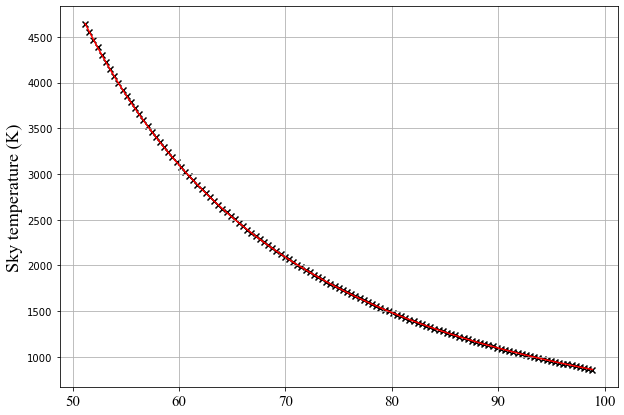

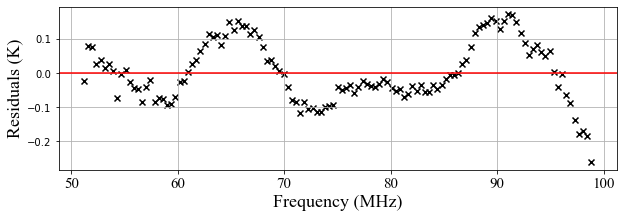

Chi-squared for this fit is 0.9451 with 118 degrees of freedom


In [22]:
central_freq = 75

all_data = np.genfromtxt('skytemperature.csv', delimiter=',', skip_header=1)
all_data = all_data[3:-2]   # Removing points with zero weight and no data

frequencies = all_data[:, 0]    # MHz
frequencies_frac = frequencies / central_freq   # No units
sky_temps = all_data[:, 2]  # K

d = sky_temps
A = np.empty((0, 5))
for freq in frequencies_frac:
    temp = np.array([freq**(-2.5), freq**(-2.5)*np.log(freq), freq**(-2.5)*(np.log(freq))**2, freq**(-4.5), freq**(-2)])
    A = np.vstack((A, temp))

theta_MLE = np.dot(np.linalg.inv(np.dot(A.T, A)), np.dot(A.T, d))

def linearized_model(freq_fracs, params):

    return params[0]*freq_fracs**(-2.5) + params[1]*freq_fracs**(-2.5)*np.log(freq_fracs) + \
           params[2]*freq_fracs**(-2.5)*(np.log(freq_fracs))**2 + params[3]*freq_fracs**(-4.5) + params[4]*freq_fracs**(-2)

predictions = linearized_model(frequencies_frac, theta_MLE)
residuals = sky_temps - predictions

def question_2_1_plot(model_predictions, model_residuals):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111)
    ax.plot(frequencies, model_predictions, color='red')
    ax.scatter(frequencies, sky_temps, marker='x', color='black')
    ax.set_ylabel('Sky temperature (K)', fontsize=18, fontname='Times new Roman')
    plt.xticks(fontsize=15, fontname='Times new Roman')
    plt.xticks(fontsize=15, fontname='Times new Roman')
    plt.grid(True)
    plt.show()

    fig = plt.figure(figsize=(10, 3))
    ax = fig.add_subplot(111)
    ax.scatter(frequencies, model_residuals, marker='x', color='black')
    ax.axhline(0, color='red')
    ax.set_ylabel('Residuals (K)', fontsize=18, fontname='Times new Roman')
    ax.set_xlabel('Frequency (MHz)', fontsize=18, fontname='Times new Roman')
    plt.xticks(fontsize=15, fontname='Times new Roman')
    plt.xticks(fontsize=15, fontname='Times new Roman')
    plt.grid(True)
    plt.show()

question_2_1_plot(predictions, residuals)

chi_squared_original = np.dot((d - np.dot(A, theta_MLE)).T, d - np.dot(A, theta_MLE))
dof_original = len(sky_temps) - len(theta_MLE)
print(f"Chi-squared for this fit is {chi_squared_original:.4f} with {dof_original} degrees of freedom")

### b.)

The model we used is a linearized version of the model:

$$ T[\nu] = b_0 \nu^{-2.5 + b_1 + b_2 ln(\nu)} e^{-b_3 \nu^{-2}} + b_4 \nu^{-2} $$

We can use a non-linear optimization routine to find the MLE parameters with this model.

We can also find the $\chi^2$ for this fit using (again omitting $\Sigma$):

$$ \chi^2 = \sum_{i=1}^{N} (d_i - T_{i})^2 $$

C:\Users\divij\AppData\Local\Temp\ipykernel_20924\651815288.py:6: RuntimeWarning: overflow encountered in multiply
  return b0 * np.power(freq_fracs, term1) * np.exp(term2) + b4*freq_fracs**(-2)


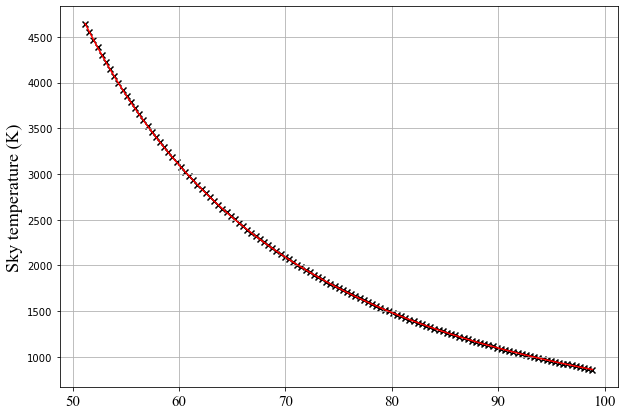

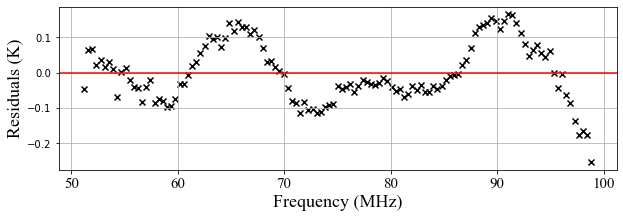

Chi-squared for this fit is 0.873542 with 118 degrees of freedom


In [23]:
def physical_model(freq_fracs, b0, b1, b2, b3, b4):

    term1 = -2.5 + b1 + b2*np.log(freq_fracs)
    term2 = -b3 * freq_fracs**(-2)

    return b0 * np.power(freq_fracs, term1) * np.exp(term2) + b4*freq_fracs**(-2)

theta_MLE, theta_MLE_cov = scipy.optimize.curve_fit(physical_model, frequencies_frac, sky_temps)

predictions = physical_model(frequencies_frac, theta_MLE[0], theta_MLE[1], theta_MLE[2], theta_MLE[3], theta_MLE[4])
residuals = sky_temps - predictions

question_2_1_plot(predictions, residuals)

chi_squared = np.sum((sky_temps - predictions)**2)
dof = len(sky_temps) - len(theta_MLE)
print(f"Chi-squared for this fit is {chi_squared:.6f} with {dof} degrees of freedom")

### c.)

We can simplify the model to:

$$ ln(T - b_4 \nu^{-2}) + 2.5 ln(\nu) = ln(b_0) + b_1 ln(\nu) + b_2 (ln(\nu)))^2 - b_3 \nu^{-2} $$

To maintain the same weights on each point as before we need (on the diagonals):

$$ \sigma_{\nu}^2 \propto \left( \frac{dln(T - b_4 \nu^{-2})}{dT} \right)^2 = \frac{1}{(T - b_4 \nu^{-2})^2} $$

For each value of $b_4$, we can iteratively get find the MLE parameters and over many trials find the value that minimizes the $\chi^2$ calculated using those parameters. The equations used for this are:

$$ \theta^* = (A^T \cdot \Sigma^{-1} \cdot A)^{-1} \cdot (A^T \cdot \Sigma^{-1} \cdot d) = Argmin[||\Sigma^{-0.5} \cdot (d - A \cdot \theta)||^2] $$

$$ \chi^2 = ||\Sigma^{-0.5} \cdot (d - A \cdot \theta)||^2 $$

where: $d = ln(T - b_4 \nu^{-2}) + 2.5 ln(\nu)$, $ A = \begin{pmatrix}
1 & ln{\nu_1} & (ln{\nu_1})^2 & -\nu_{1}^{-2} \\
1 & ln{\nu_2} & (ln{\nu_2})^2 & -\nu_{2}^{-2} \\
\vdots & \vdots & \vdots & \vdots \\
1 & ln{\nu_N} & (ln{\nu_N})^2 & -\nu_{N}^{-2}
\end{pmatrix} $ , $ \theta = \begin{pmatrix}
ln(b_0) = c \\
b_1 \\
b_2 \\
b_3
\end{pmatrix} $, $\Sigma_{ij} = \sigma_{\nu} \delta_{ij}$ or $\Sigma_{ij}^{-0.5} = (T - b_4 \nu^{-2}) \delta_{ij}$

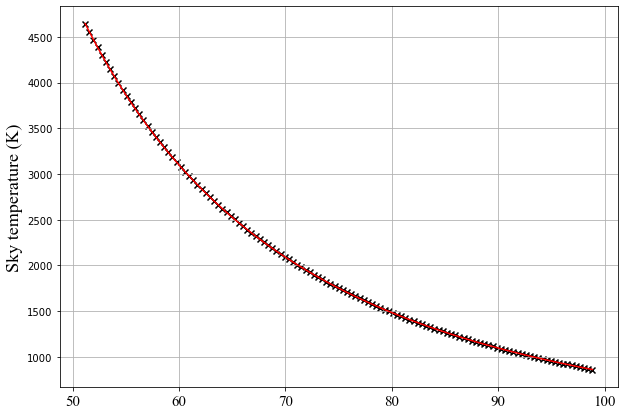

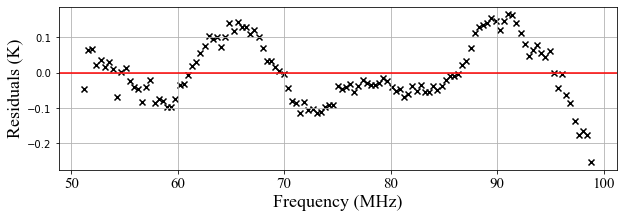

Chi-squared for this fit is 0.873526 with 118 degrees of freedom


In [24]:
def question_2_1_c(b4, full_output=False):
    d = np.log(sky_temps - b4 * np.power(frequencies_frac, -2)) + 2.5 * np.log(frequencies_frac)

    cov_power = sky_temps - b4 * np.power(frequencies_frac, -2)
    cov_power = np.diag(cov_power)

    A = np.empty((0, 4))
    for freq in frequencies_frac:
        temp = np.array([1, np.log(freq), (np.log(freq))**2, -freq**(-2)])
        A = np.vstack((A, temp))

    theta_MLE = np.linalg.lstsq(np.dot(cov_power, A), np.dot(cov_power, d), rcond=None)[0]
    chi_squared = np.linalg.norm(np.dot(cov_power, d - np.dot(A, theta_MLE)))**2

    if full_output:
        return chi_squared, theta_MLE

    return chi_squared

best_b4 = scipy.optimize.differential_evolution(question_2_1_c, [(800, 1200)]).x[0]
chi_squared, theta_MLE = question_2_1_c(best_b4, full_output=True)

predictions = physical_model(frequencies_frac, np.exp(theta_MLE[0]), theta_MLE[1], theta_MLE[2], theta_MLE[3], best_b4)
residuals = sky_temps - predictions

question_2_1_plot(predictions, residuals)

dof = len(sky_temps) - len(theta_MLE) - 1
print(f"Chi-squared for this fit is {chi_squared:.6f} with {dof} degrees of freedom")

### Part 2

### a.)

Add the following function to our fit from Part 1, Part a:

$$ c_0 \cdot exp \left[ - \left| \frac{\nu - c_1}{c_2} \right|^5 \right] $$

so that we now have the model:

$$ T[\nu] \approx a_0 \nu^{-2.5} + a_1 \nu^{-2.5} ln{\nu} + a_2 \nu^{-2.5} (ln{\nu})^2 + a_3 \nu^{-4.5} + a_4 \nu_{1}^{-2} + c_0 \cdot exp \left[ - \left| \frac{\nu - c_1}{c_2} \right|^5 \right] $$

We can use a similar technique to last time and vary the non-linear $c_1$ and $c_2$ parameters manually to find which ones minimize the $\chi^2$ found using MLE parameters. Since we assume linear weights, $\Sigma = I$, it drops out so the formulae become:

$$ \theta^* = (A^T \cdot A)^{-1} \cdot (A^T \cdot d) = Argmin[||(d - A \cdot \theta)||^2] $$

$$ \chi^2 = ||(d - A \cdot \theta)||^2 $$

where: $d = T$, $ A = \begin{pmatrix}
\nu_{1}^{-2.5} & \nu_{1}^{-2.5} ln{\nu_1} & \nu_{1}^{-2.5} (ln{\nu_1})^2 & \nu_{1}^{-4.5} & \nu_{1}^{-2} & exp \left[ - \left| \frac{\nu_1 - c_1}{c_2} \right|^5 \right]\\
\nu_{2}^{-2.5} & \nu_{2}^{-2.5} ln{\nu_2} & \nu_{2}^{-2.5} (ln{\nu_2})^2 & \nu_{2}^{-4.5} & \nu_{2}^{-2} & exp \left[ - \left| \frac{\nu_2 - c_1}{c_2} \right|^5 \right] \\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\
\nu_{N}^{-2.5} & \nu_{N}^{-2.5} ln{\nu_N} & \nu_{N}^{-2.5} (ln{\nu_N})^2 & \nu_{N}^{-4.5} & \nu_{N}^{-2} & exp \left[ - \left| \frac{\nu_N - c_1}{c_2} \right|^5 \right]
\end{pmatrix} $ , $ \theta = \begin{pmatrix}
a_0 \\
a_1 \\
a_2 \\
a_3 \\
a_4 \\
c_0
\end{pmatrix} $

Note that $c_1$ and $c_2$ are fractions of the central frequency (75 MHz) !! Also we know that $c_0$, $c_1$ and $c_2$ are roughly 0.5 K, 80 MHz and 15 MHz respectively ($c_0$ is an amplitude).

In [25]:
%%time

def question_2_2_a(c_params, full_output=False):

    d = sky_temps
    A = np.empty((0, 6))
    for freq in frequencies_frac:
        temp = np.array([ freq**(-2.5), freq**(-2.5)*np.log(freq), freq**(-2.5)*(np.log(freq))**2, freq**(-4.5), freq**(-2),
                          np.exp(-np.power(np.abs((freq - c_params[0])/c_params[1]), 5)) ])
        A = np.vstack((A, temp))

    theta_MLE = np.linalg.lstsq(A, d, rcond=None)[0]
    chi_squared = np.dot((d - np.dot(A, theta_MLE)).T, d - np.dot(A, theta_MLE))

    if full_output:
        return chi_squared, theta_MLE

    return chi_squared

def linearized_model_better(freq_fracs, linear_params, nonlinear_params):

    return linear_params[0]*freq_fracs**(-2.5) + linear_params[1]*freq_fracs**(-2.5)*np.log(freq_fracs) + \
           linear_params[2]*freq_fracs**(-2.5)*(np.log(freq_fracs))**2 + linear_params[3]*freq_fracs**(-4.5) + \
           linear_params[4]*freq_fracs**(-2) + \
           linear_params[5]*np.exp(-np.power(np.abs((freq_fracs - nonlinear_params[0])/nonlinear_params[1]), 5))

best_c1, best_c2 = scipy.optimize.differential_evolution(question_2_2_a, [(1, 1.1), (0, 0.5)]).x
chi_squared_better, theta_MLE = question_2_2_a([best_c1, best_c2], full_output=True)
dof_better = len(sky_temps) - len(theta_MLE) - 2

predictions = linearized_model_better(frequencies_frac, theta_MLE, [best_c1, best_c2])
residuals = sky_temps - predictions

rms_residuals = np.sqrt(np.mean(np.power(residuals, 2)))

print(f"Found: c0 = {np.abs(theta_MLE[-1]):.3f} K, c1 = {best_c1 * 75:.3f} MHz (and c2 = {best_c2 * 75:.3f} MHz)")
print(f"Found the root-mean-square residuals to be: {rms_residuals:.5f} K")

Found: c0 = 0.499 K, c1 = 78.255 MHz (and c2 = 10.036 MHz)
Found the root-mean-square residuals to be: 0.02463 K
CPU times: total: 8.06 s
Wall time: 1.4 s


$c_0$ and $c_1$ agree fairly well with the published values of 0.53 K and 78 MHz respectively. RMS residuals also agrees very well with the published value of 25 mK.

### b.)

We now take the error on each measurement to be $\sigma_T = 25 mK$ (uncorrelated) (comes from setting $\chi^2_{dof} = 1$) so that:

$$ \Sigma_{ij} = \delta_{ij} \sigma_T^2 $$

Without redoing the minimization process, we can see what the $\chi^2$ was before and after adding this extra component using:

$$ \chi^2 = \sum_{i=1}^{N} \frac{(d_i - T_i^{pred})^2}{\sigma_T^2} = \frac{1}{\sigma_T^2} \sum_{i=1}^{N} (d_i - T_i^{pred})^2 $$

since the errors are all equal for all the measurements. This also shows that we don't need to redo the minimization since we are globally scaling all the $\chi^2$ values so the minimum won't change, it is just rescalled.

In [26]:
cov = 0.025**2

print(f"Original linear model: chi-squared = {chi_squared_original/cov:.2f} with {dof_original} degrees of freedom")
print(f"Modified linear model: chi-squared = {chi_squared_better/cov:.2f} with {dof_better} degrees of freedom")

Original linear model: chi-squared = 1512.17 with 118 degrees of freedom
Modified linear model: chi-squared = 119.34 with 115 degrees of freedom


Using the same model as in the last question, we now vary $c_0$ manually by minimizing $\chi^2$ for each $c_0$ value to determine it's error. The $1\sigma_{c_0}$ interval is approximately the range of $c_0$ where $\chi^2 \le \chi_{min}^2 + 1$.

To do this we use the equations from before with some modifications:

$$ \theta^* = (A^T \cdot \Sigma^{-1} \cdot A)^{-1} \cdot (A^T \cdot \Sigma^{-1} \cdot d) = Argmin[||\Sigma^{-0.5} \cdot (d - A \cdot \theta)||^2] $$

$$ \chi^2 = ||\Sigma^{-0.5} \cdot (d - A \cdot \theta)||^2 $$

where $d = T - c_0 \cdot exp \left[ - \left| \frac{\nu - c_1}{c_2} \right|^5 \right]$ , $ A = \begin{pmatrix}
\nu_{1}^{-2.5} & \nu_{1}^{-2.5} ln{\nu_1} & \nu_{1}^{-2.5} (ln{\nu_1})^2 & \nu_{1}^{-4.5} & \nu_{1}^{-2}\\
\nu_{2}^{-2.5} & \nu_{2}^{-2.5} ln{\nu_2} & \nu_{2}^{-2.5} (ln{\nu_2})^2 & \nu_{2}^{-4.5} & \nu_{2}^{-2} \\
\vdots & \vdots & \vdots & \vdots & \vdots \\
\nu_{N}^{-2.5} & \nu_{N}^{-2.5} ln{\nu_N} & \nu_{N}^{-2.5} (ln{\nu_N})^2 & \nu_{N}^{-4.5} & \nu_{N}^{-2}
\end{pmatrix} $ , $ \theta = \begin{pmatrix}
a_0 \\
a_1 \\
a_2 \\
a_3 \\
a_4
\end{pmatrix} $

In [27]:
%%time

cov_power = np.diag(np.ones(len(sky_temps)) * 40)

def question_2_2_b_1(c_params, full_output=False):

    d = sky_temps - c0 * np.exp(-np.power(np.abs((frequencies_frac - c_params[0])/c_params[1]), 5))
    A = np.empty((0, 5))
    for freq in frequencies_frac:
        temp = np.array([ freq**(-2.5), freq**(-2.5)*np.log(freq), freq**(-2.5)*(np.log(freq))**2, freq**(-4.5), freq**(-2) ])
        A = np.vstack((A, temp))

    theta_MLE = np.linalg.lstsq(np.dot(cov_power, A), np.dot(cov_power, d), rcond=None)[0]
    chi_squared = np.linalg.norm(np.dot(cov_power, d - np.dot(A, theta_MLE)))**2

    if full_output:
        return chi_squared, theta_MLE

    return chi_squared

c0_range = np.linspace(-0.52, -0.48, 100)
chi_squared_range = []

for c0 in c0_range:
    best_c1, best_c2 = scipy.optimize.differential_evolution(question_2_2_b_1, [(0.1, 2.0), (0.01, 1)]).x
    chi_squared = question_2_2_b_1([best_c1, best_c2])
    chi_squared_range.append(chi_squared)

CPU times: total: 15min 7s
Wall time: 2min 37s


In [28]:
min_index = np.argmin(chi_squared_range)
chi_squared_min = chi_squared_range[min_index]
c0_best = c0_range[min_index]

std_index_lower = np.argmin(np.abs(chi_squared_range[:min_index] - (chi_squared_min + 1)))
std_index_upper = np.argmin(np.abs(chi_squared_range[min_index:] - (chi_squared_min + 1))) + min_index

c0_best_std = 0.5 * (np.abs(c0_best - c0_range[std_index_lower]) + np.abs(c0_best - c0_range[std_index_upper]))

print(f"Found: c0 = {np.abs(c0_best):.3f} ± {c0_best_std:.4f} mK")
print(f"This gives the signal to noise ratio as: {np.abs(c0_best)/c0_best_std:.2f}")

Found: c0 = 0.499 ± 0.0164 mK
This gives the signal to noise ratio as: 30.49


This signal-to-noise ratio is slightly lower than the value of 37 quoted in the paper but since their model was a bit different this is to be expected.

### c.) (Extra credit)

### Part 3

### a.)

We now assume the errors to be correlated with the covariance matrix approximately given by:

$$ Cov(T_1, T_2) \approx A \delta_{ij} + B cos \left[ \frac{0.3}{MHz} (\nu_1 - \nu_2) \right] exp \left[ - \left| \frac{\nu_1 - \nu_2}{60 MHz} \right| \right] $$

where $\nu$ is now the frequency in MHz (not dimensionless value by dividing my 75 MHz). We take $A = (25 mK)^2$ and $B = 2A$ for our dataset.

In [29]:
A = 0.025**2
B = 2 * A

cov = np.empty((0, len(frequencies)))
for freq1 in frequencies:
    temp = np.array([])
    for freq2 in frequencies:
        to_append = B * np.cos(0.3 * (freq1 - freq2)) * np.exp(-np.abs((freq1 - freq2)/60))
        if freq1 == freq2:
            to_append += A
        temp = np.append(temp, to_append)
    cov = np.vstack((cov, temp))

print(cov)

[[ 1.87500000e-03  1.23337080e-03  1.20009617e-03 ...  4.26915764e-05
  -2.41689676e-05 -8.98341779e-05]
 [ 1.23337080e-03  1.87500000e-03  1.23337080e-03 ...  1.09837138e-04
   4.26915764e-05 -2.41689676e-05]
 [ 1.20009617e-03  1.23337080e-03  1.87500000e-03 ...  1.76341522e-04
   1.09837138e-04  4.26915764e-05]
 ...
 [ 4.26915764e-05  1.09837138e-04  1.76341522e-04 ...  1.87500000e-03
   1.23337080e-03  1.20009617e-03]
 [-2.41689676e-05  4.26915764e-05  1.09837138e-04 ...  1.23337080e-03
   1.87500000e-03  1.23337080e-03]
 [-8.98341779e-05 -2.41689676e-05  4.26915764e-05 ...  1.20009617e-03
   1.23337080e-03  1.87500000e-03]]


### b.)

Using the same model as in Part 1 a, we now redo the minimisation but this time we add the covariance matrix we just calculated, so we have:

$$ \theta^* = (A^T \cdot \Sigma^{-1} \cdot A)^{-1} \cdot (A^T \cdot \Sigma^{-1} \cdot d) = Argmin[||\Sigma^{-0.5} \cdot (d - A \cdot \theta)||^2] $$

$$ \chi^2 = (d - A \cdot \theta)^T \cdot \Sigma^{-1} \cdot (d - A \cdot \theta) = ||\Sigma^{-0.5} \cdot (d - A \cdot \theta)||^2 $$

with the same $d$, $A$ and $\theta$ as in Part 1 a and with $\Sigma = Cov(T_1, T_2)$ from above.

In [30]:
d = sky_temps
A = np.empty((0, 5))
for freq in frequencies_frac:
    temp = np.array([freq**(-2.5), freq**(-2.5)*np.log(freq), freq**(-2.5)*(np.log(freq))**2, freq**(-4.5), freq**(-2)])
    A = np.vstack((A, temp))

theta_MLE = np.dot( np.linalg.inv( np.dot(A.T , np.dot(np.linalg.inv(cov), A)) ), np.dot(A.T , np.dot(np.linalg.inv(cov), d)) )
chi_squared = np.dot( (d - np.dot(A, theta_MLE)).T, np.dot( np.linalg.inv(cov), d - np.dot(A, theta_MLE) ) )

dof = len(sky_temps) - len(theta_MLE)
print(f"Chi-squared for this fit is {chi_squared:.2f} with {dof} degrees of freedom")

Chi-squared for this fit is 204.58 with 118 degrees of freedom


Now using the same model as in Part 2 a (with the extra added term)

In [31]:
cov_power = scipy.linalg.sqrtm(np.linalg.inv(cov))

def question_2_3_b(c_params, full_output=False):

    d = sky_temps
    A = np.empty((0, 6))
    for freq in frequencies_frac:
        temp = np.array([ freq**(-2.5), freq**(-2.5)*np.log(freq), freq**(-2.5)*(np.log(freq))**2, freq**(-4.5), freq**(-2),
                          np.exp(-np.power(np.abs((freq - c_params[0])/c_params[1]), 5)) ])
        A = np.vstack((A, temp))

    theta_MLE = np.linalg.lstsq(np.dot(cov_power, A), np.dot(cov_power, d), rcond=None)[0]
    chi_squared = np.linalg.norm(np.dot(cov_power, d - np.dot(A, theta_MLE)))**2

    if full_output:
        return chi_squared, theta_MLE

    return chi_squared

best_c1, best_c2 = scipy.optimize.differential_evolution(question_2_3_b, [(1, 1.1), (0.01, 0.5)]).x
chi_squared, theta_MLE = question_2_3_b([best_c1, best_c2], full_output=True)
dof = len(sky_temps) - len(theta_MLE) - 2
print(f"Chi-squared for this fit is {chi_squared:.4f} with {dof} degrees of freedom")

Chi-squared for this fit is 88.9213 with 115 degrees of freedom


### c.)

Now we take the same model as in Part 2 but allow the exponent to vary so we have the extra term as:

$$ c_0 \cdot exp \left[ - \left| \frac{\nu - c_1}{c_2} \right|^{\sqrt{c_3^2}} \right] $$

where $\sqrt{c_3^2}$ is written as such to avoid the exponent being negative. To find the MLE parameters, we can use a very similar method to Part 2 b but this time manually allow $c_3$ to vary as another non-linear parameter.

In [32]:
%%time

def question_2_3_c(c_params, full_output=False):

    d = sky_temps - c0 * np.exp(-np.power(np.abs((frequencies_frac - c_params[0])/c_params[1]), np.sqrt(c_params[2]**2)))
    A = np.empty((0, 5))
    for freq in frequencies_frac:
        temp = np.array([ freq**(-2.5), freq**(-2.5)*np.log(freq), freq**(-2.5)*(np.log(freq))**2, freq**(-4.5), freq**(-2) ])
        A = np.vstack((A, temp))

    theta_MLE = np.linalg.lstsq(np.dot(cov_power, A), np.dot(cov_power, d), rcond=None)[0]
    chi_squared = np.linalg.norm(np.dot(cov_power, d - np.dot(A, theta_MLE)))**2

    if full_output:
        return chi_squared, theta_MLE

    return chi_squared

c0_range = np.linspace(-0.58, -0.42, 100)
chi_squared_range = []
best_params_range = np.empty((0, 3))

for c0 in c0_range:
    best_c1, best_c2, best_c3 = scipy.optimize.differential_evolution(question_2_3_c, [(1, 1.1), (0.01, 0.5), (2, 8)]).x
    chi_squared = question_2_3_c([best_c1, best_c2, best_c3])
    best_params_range = np.vstack((best_params_range, np.array([best_c1, best_c2, best_c3])))
    chi_squared_range.append(chi_squared)

CPU times: total: 14min 40s
Wall time: 2min 28s


In [33]:
min_index = np.argmin(chi_squared_range)
chi_squared_min = chi_squared_range[min_index]
c0_best = c0_range[min_index]

std_index_lower = np.argmin(np.abs(chi_squared_range[:min_index] - (chi_squared_min + 1)))
std_index_upper = np.argmin(np.abs(chi_squared_range[min_index:] - (chi_squared_min + 1))) + min_index

c0_best_std = 0.5 * (np.abs(c0_best - c0_range[std_index_lower]) + np.abs(c0_best - c0_range[std_index_upper]))

best_c1 = best_params_range[min_index][0]
best_c2 = best_params_range[min_index][1]
best_c3 = best_params_range[min_index][2]

print(f"Found: c0 = {np.abs(c0_best):.3f} ± {c0_best_std:.4f} mK")
print(f"This is {(0.53 - np.abs(c0_best))/c0_best_std:.2f} sigma out from the reported value of 0.53 mK")
print(f"(Also found: c1 = {best_c1 * 75:.2f} MHz, c2 = {best_c2 * 75:.2f} MHz, c3 = {best_c3:.1f})")

Found: c0 = 0.565 ± 0.0469 mK
This is -0.76 sigma out from the reported value of 0.53 mK
(Also found: c1 = 78.09 MHz, c2 = 9.96 MHz, c3 = 4.2)


### d.)

To mimic what the team did in the paper, we now try an exponent of 2 now and see what results we get.

In [44]:
%%time

def question_2_3_4(c_params, full_output=False):

    d = sky_temps - c0 * np.exp(-np.power(np.abs((frequencies_frac - c_params[0])/c_params[1]), 2))
    A = np.empty((0, 5))
    for freq in frequencies_frac:
        temp = np.array([ freq**(-2.5), freq**(-2.5)*np.log(freq), freq**(-2.5)*(np.log(freq))**2, freq**(-4.5), freq**(-2) ])
        A = np.vstack((A, temp))

    theta_MLE = np.linalg.lstsq(np.dot(cov_power, A), np.dot(cov_power, d), rcond=None)[0]
    chi_squared = np.linalg.norm(np.dot(cov_power, d - np.dot(A, theta_MLE)))**2

    if full_output:
        return chi_squared, theta_MLE

    return chi_squared

c0_range = np.linspace(-0.52, -0.48, 100)
chi_squared_range = []
best_params_range = np.empty((0, 2))

for c0 in c0_range:
    best_c1, best_c2 = scipy.optimize.differential_evolution(question_2_3_4, [(0.8, 1.3), (0.01, 0.6)]).x
    chi_squared = question_2_3_4([best_c1, best_c2])
    best_params_range = np.vstack((best_params_range, np.array([best_c1, best_c2])))
    chi_squared_range.append(chi_squared)

CPU times: total: 3min 41s
Wall time: 41.1 s


In [45]:
min_index = np.argmin(chi_squared_range)
chi_squared_min = chi_squared_range[min_index]
c0_best = c0_range[min_index]

std_index_lower = np.argmin(np.abs(chi_squared_range[:min_index] - (chi_squared_min + 1)))
std_index_upper = np.argmin(np.abs(chi_squared_range[min_index:] - (chi_squared_min + 1))) + min_index

c0_best_std = 0.5 * (np.abs(c0_best - c0_range[std_index_lower]) + np.abs(c0_best - c0_range[std_index_upper]))

best_c1 = best_params_range[min_index][0]
best_c2 = best_params_range[min_index][1]

print(f"Found: c0 = {np.abs(c0_best):.3f} ± {c0_best_std:.4f} mK")
print(f"(Also found: c1 = {best_c1 * 75:.2f} MHz, c2 = {best_c2 * 75:.2f} MHz)")

Found: c0 = 1.100 ± 0.0404 mK
(Also found: c1 = 96.63 MHz, c2 = 41.79 MHz)
